In [11]:
import numpy as np
import pandas as pd
import os
import requests
from bs4 import BeautifulSoup
import json

In [2]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

In [3]:
testdata=pd.read_csv('../data/invest_cleaned.csv')
# testdata

In [4]:
city=['BJ','TJ','SH','CQ','Shijiazhuang','Taiyuan','呼和浩特','沈阳','长春','哈尔滨','Nanjing','Hangzhou','合肥','福州','南昌','Jinan',
      'Zhengzhou','Wuhan','Changsha','Guangzhou','南宁','Haikou','Chengdu','贵阳','昆明','拉萨','Xi\'an','Lanzhou','西宁','银川','乌鲁木齐']
citycode=[11,12,31,50,1301,1401,1501,2101,2201,2301,3201,3301,3401,3501,3601,3701,4101,4201,4301,4401,
          4501,4601,5101,5201,5301,5401,6101,6201,6301,6401,6501]
citycode=[str(i) for i in citycode]

lst1=list(testdata['company_area_code'].astype(str))
lst2=list(testdata['invested_company_area_code'].astype(str))
I_out=[]
I_in=[]
for i in citycode:
    num=0
    a=len(i)
    for j in lst1:
        if i==j[:a]:
            num+=1
    I_out.append(num)
for i in citycode:
    num=0
    a=len(i)
    for j in lst2:
        if i==j[:a]:
            num+=1
    I_in.append(num)

I_out=np.array(I_out)
I_in=np.array(I_in)

In [5]:
# 29 samples
I_out1=np.delete(I_out, 25, 0)
I_out1=np.delete(I_out1, 28, 0)
I_in1=np.delete(I_in, 25, 0)
I_in1=np.delete(I_in1, 28, 0)

In [6]:
# 28 samples
I_out2=np.delete(I_out1, 6, 0)
I_in2=np.delete(I_in1, 6, 0)

In [7]:
I_out=scaler.fit_transform(I_out.reshape(-1,1))
I_out=[float(i) for i in I_out]
I_in=scaler.fit_transform(I_in.reshape(-1,1))
I_in=[float(i) for i in I_in]

I_out1=scaler.fit_transform(I_out1.reshape(-1,1))
I_out1=[float(i) for i in I_out1]
I_in1=scaler.fit_transform(I_in1.reshape(-1,1))
I_in1=[float(i) for i in I_in1]

I_out2=scaler.fit_transform(I_out2.reshape(-1,1))
I_out2=[float(i) for i in I_out2]
I_in2=scaler.fit_transform(I_in2.reshape(-1,1))
I_in2=[float(i) for i in I_in2]

In [8]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import optimize as op
from sklearn.metrics import r2_score

plt.rc('font',family='Arial')

# GDP(2021)(27+4)cities

In [9]:
gdp = np.array([40269.55,15695.05,43214.85,27894.02,6490.3,5121.61,3121.4,7249.7,7103.12,5351.7,16355.32,18109.42,11412.8,
                11324.48,6650.53,11432.2,12691.02,17716.76,13270.7,28231.97,5120.94,2057.06,19916.98,4711.04,7222.5,741.84,
                10688.28,3231.29,1548.8,2262.95,3691.57])
gdp=scaler.fit_transform(gdp.reshape(-1,1))
gdp=[float(i) for i in gdp]

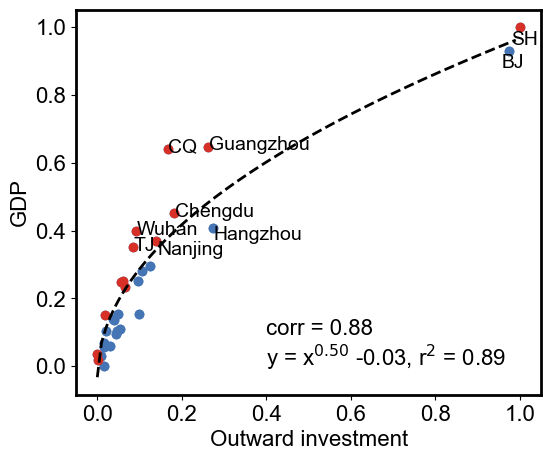

In [10]:
plt.figure(figsize=[6,5])
plt.ylabel('GDP',fontsize=16)
plt.xlabel('Outward investment',fontsize=16)
plt.scatter(I_out,gdp,color=['#4575b4'])

corr=np.corrcoef(I_out, gdp)[0][1]

def fund(x, a, b):
    return x ** a + b

a, b = curve_fit(fund, I_out, gdp)[0]
x = np.arange(0, 1, 0.01)
y = x ** a + b
plt.plot(x, y,color='black',linestyle='dashed',linewidth=2)
# plt.title('$\gamma$=%.2f, corr=%.2f'%(a,corr))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

for i in range(len(gdp)):
    if gdp[i] <= fund(I_out[i], a, b):
        plt.scatter(I_out[i],gdp[i],color=['#4575b4'])
    else:
        plt.scatter(I_out[i],gdp[i],color=['#d73027'])

for i in ['TJ','CQ','Wuhan','Guangzhou','Chengdu']:
    plt.text(I_out[city.index(i)]*1.01, gdp[city.index(i)]*1.01, i, fontsize=14,verticalalignment='center')
for i in ['Nanjing','Hangzhou']:
    plt.text(I_out[city.index(i)]*1.01, gdp[city.index(i)]*1.01, i, fontsize=14,verticalalignment='top')
for i in ['BJ','SH']:
    plt.text(I_out[city.index(i)]*1.01, gdp[city.index(i)]*0.99, i, fontsize=14,horizontalalignment='center',verticalalignment='top')

pred=[]
for i in I_out:
    pred.append(i ** a + b)
r2=r2_score(gdp, pred)
plt.text(x=0.4,y=0, s='corr = %.2f\ny = x$^{%.2f}$ %.2f, r$^2$ = %.2f'%(corr,a,b,r2), fontsize=16)

bwith = 2
ax = plt.gca()
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)

plt.show()

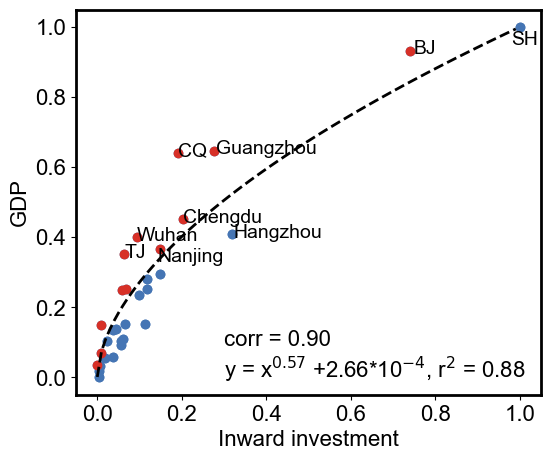

In [12]:
plt.figure(figsize=[6,5])
plt.ylabel('GDP',fontsize=16)
plt.xlabel('Inward investment',fontsize=16)
plt.scatter(I_in,gdp,color=['#4575b4'])

corr=np.corrcoef(I_in, gdp)[0][1]

def fund(x, a, b):
    return x ** a + b

a, b = curve_fit(fund, I_in, gdp)[0]
x = np.arange(0, 1, 0.01)
y = x ** a + b
plt.plot(x, y,color='black',linestyle='dashed',linewidth=2)
# plt.title('$\gamma$=%.2f, corr=%.2f'%(a,corr))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

for i in range(len(gdp)):
    if gdp[i] <= fund(I_in[i], a, b):
        plt.scatter(I_in[i],gdp[i],color=['#4575b4'])
    else:
        plt.scatter(I_in[i],gdp[i],color=['#d73027'])

for i in ['BJ','TJ','CQ','Hangzhou','Wuhan','Guangzhou','Chengdu']:
    plt.text(I_in[city.index(i)]*1.01, gdp[city.index(i)]*1.01, i, fontsize=14,verticalalignment='center')
for i in ['Nanjing']:
    plt.text(I_out[city.index(i)]*1.01, gdp[city.index(i)]*1.01, i, fontsize=14,verticalalignment='top')
for i in ['SH']:
    plt.text(I_out[city.index(i)]*1.01, gdp[city.index(i)]*0.99, i, fontsize=14,horizontalalignment='center',verticalalignment='top')

pred=[]
for i in I_in:
    pred.append(i ** a + b)
r2=r2_score(gdp, pred)
# plt.text(x=0.4,y=0, s='corr = %.2f\ny = x$^{%.2f}$ +%f, r$^2$ = %.2f'%(corr,a,b,r2), fontsize=16)
plt.text(x=0.3,y=0, s='corr = %.2f\ny = x$^{%.2f}$ +2.66*10$^{-4}$, r$^2$ = %.2f'%(corr,a,r2), fontsize=16)


bwith = 2 
ax = plt.gca()
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)
    
plt.show()

# population inflow(2021)(25+4)cities

In [13]:
# 29samples
y_in = np.array([0.0233 ,0.0103 ,0.0240 ,0.0098 ,0.0056 ,0.0082 ,0.0027 ,0.0084 ,0.0058 ,0.0057 ,0.0136 ,0.0168 ,0.0093 
                 ,0.0048 ,0.0067 ,0.0108 ,0.0190 ,0.0123 ,0.0132 ,0.0303 ,0.0082 ,0.0046 ,0.0196 ,0.0095 ,0.0105 ,0.0168 
                 ,0.0059 ,0.0035 ,0.0037])

y_in=scaler.fit_transform(y_in.reshape(-1,1))
y_in=np.array([float(i) for i in y_in])

C:\Users\19395\AppData\Local\Temp\ipykernel_27172\1549794409.py:16: RuntimeWarning: divide by zero encountered in power
  return x ** a + b


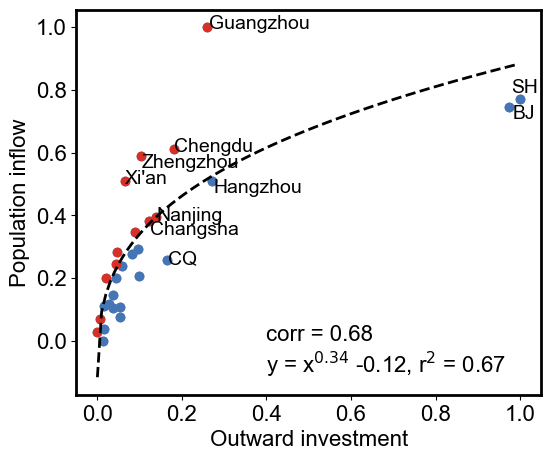

In [14]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import optimize as op

city1=['BJ','TJ','SH','CQ','Shijiazhuang','Taiyuan','呼和浩特','沈阳','长春','哈尔滨','Nanjing','Hangzhou','合肥','福州','南昌','Jinan',
      'Zhengzhou','Wuhan','Changsha','Guangzhou','南宁','Haikou','Chengdu','贵阳','昆明','Xi\'an','Lanzhou','银川','乌鲁木齐']

plt.figure(figsize=[6,5])
plt.ylabel('Population inflow',fontsize=16)
plt.xlabel('Outward investment',fontsize=16)
plt.scatter(I_out1,y_in,color=['#4575b4'])

corr=np.corrcoef(I_out1, y_in)[0][1]

def fund(x, a, b):
    return x ** a + b

a, b = curve_fit(fund, I_out1, y_in)[0]
x = np.arange(0, 1, 0.01)
y = x ** a + b
plt.plot(x, y,color='black',linestyle='dashed',linewidth=2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
for i in range(len(y_in)):
    if y_in[i] <= fund(I_out1[i], a, b):
        plt.scatter(I_out1[i],y_in[i],color=['#4575b4'])
    else:
        plt.scatter(I_out1[i],y_in[i],color=['#d73027'])

for i in ['CQ','Nanjing','Guangzhou','Chengdu','Xi\'an']:
    plt.text(I_out1[city1.index(i)]*1.01, y_in[city1.index(i)]*1.01, i, fontsize=14,verticalalignment='center')
for i in ['BJ','Hangzhou','Changsha','Zhengzhou']:
    plt.text(I_out1[city1.index(i)]*1.01, y_in[city1.index(i)]*1.01, i, fontsize=14,verticalalignment='top', horizontalalignment='left')
plt.text(I_out1[city1.index('SH')]*1.01, y_in[city1.index('SH')]*1.01, 'SH', fontsize=14,verticalalignment='bottom', horizontalalignment='center')

pred=[]
for i in I_out1:
    pred.append(i ** a + b)
r2=r2_score(y_in, pred)
plt.text(x=0.4,y=-0.1, s='corr = %.2f\ny = x$^{%.2f}$ %.2f, r$^2$ = %.2f'%(corr,a,b,r2), fontsize=16)

bwith = 2 
ax = plt.gca()
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)

plt.show()

C:\Users\19395\AppData\Local\Temp\ipykernel_27172\971837563.py:12: RuntimeWarning: divide by zero encountered in power
  return x ** a + b


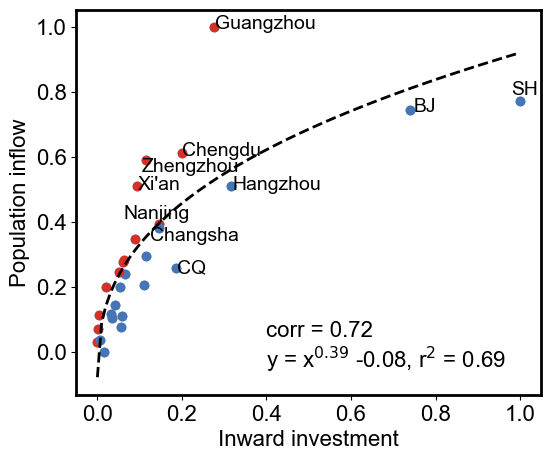

In [15]:
city1=['BJ','TJ','SH','CQ','Shijiazhuang','Taiyuan','呼和浩特','沈阳','长春','哈尔滨','Nanjing','Hangzhou','合肥','福州','南昌','Jinan',
      'Zhengzhou','Wuhan','Changsha','Guangzhou','南宁','Haikou','Chengdu','贵阳','昆明','Xi\'an','Lanzhou','银川','乌鲁木齐']

plt.figure(figsize=[6,5])
plt.ylabel('Population inflow',fontsize=16)
plt.xlabel('Inward investment',fontsize=16)
plt.scatter(I_in1,y_in,color=['#4575b4'])

corr=np.corrcoef(I_in1, y_in)[0][1]

def fund(x, a, b):
    return x ** a + b

a, b = curve_fit(fund, I_in1, y_in)[0]
x = np.arange(0, 1, 0.01)
y = x ** a + b
plt.plot(x, y,color='black',linestyle='dashed',linewidth=2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
for i in range(len(y_in)):
    if y_in[i] <= fund(I_in1[i], a, b):
        plt.scatter(I_in1[i],y_in[i],color=['#4575b4'])
    else:
        plt.scatter(I_in1[i],y_in[i],color=['#d73027'])

for i in ['BJ','CQ','Hangzhou','Guangzhou','Chengdu','Xi\'an']:
    plt.text(I_in1[city1.index(i)]*1.01, y_in[city1.index(i)]*1.01, i, fontsize=14,verticalalignment='center')
for i in ['SH','Nanjing']:
    plt.text(I_out1[city1.index(i)]*1.01, y_in[city1.index(i)]*1.01, i, fontsize=14,verticalalignment='bottom', horizontalalignment='center')
for i in ['Changsha','Zhengzhou']:
    plt.text(I_out1[city1.index(i)]*1.01, y_in[city1.index(i)]*1.01, i, fontsize=14,verticalalignment='top', horizontalalignment='left')

pred=[]
for i in I_in1:
    pred.append(i ** a + b)
r2=r2_score(y_in, pred)
plt.text(x=0.4,y=-0.05, s='corr = %.2f\ny = x$^{%.2f}$ %.2f, r$^2$ = %.2f'%(corr,a,b,r2), fontsize=16)
bwith = 2 
ax = plt.gca()
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)

plt.show()

# population outflow(2021)(24+4)cities

In [16]:
# 28samples

y_out = np.array([0.0135 ,0.0091 ,0.0180 ,0.0114 ,0.0062 ,0.0068 ,0.0065 ,0.0045 ,0.0040 ,0.0094 ,0.0131 ,0.0086 ,0.0039 
                  ,0.0045 ,0.0078 ,0.0137 ,0.0098 ,0.0114 ,0.0230 ,0.0073 ,0.0041 ,0.0192 ,0.0073 ,0.0080 ,0.0154 ,0.0036 
                  ,0.0033 ,0.0032])

y_out=scaler.fit_transform(y_out.reshape(-1,1))
y_out=np.array([float(i) for i in y_out])

C:\Users\19395\AppData\Local\Temp\ipykernel_27172\3658275684.py:16: RuntimeWarning: divide by zero encountered in power
  return x ** a + b


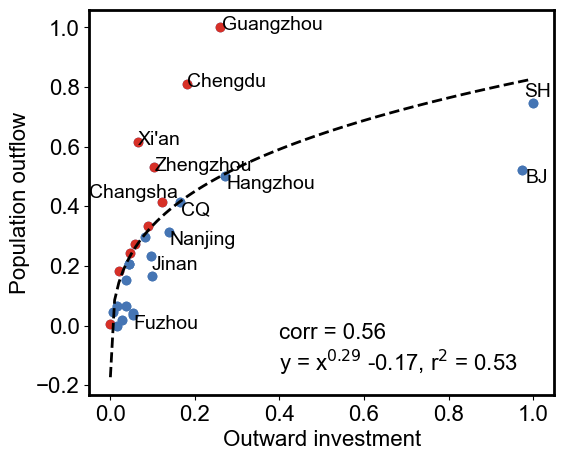

In [17]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import optimize as op

city2=['BJ','TJ','SH','CQ','Shijiazhuang','Taiyuan','沈阳','长春','哈尔滨','Nanjing','Hangzhou','合肥','Fuzhou','南昌','Jinan',
      'Zhengzhou','Wuhan','Changsha','Guangzhou','南宁','Haikou','Chengdu','贵阳','昆明','Xi\'an','Lanzhou','银川','乌鲁木齐']

plt.figure(figsize=[6,5])
plt.ylabel('Population outflow',fontsize=16)
plt.xlabel('Outward investment',fontsize=16)
plt.scatter(I_out2,y_out,color=['#4575b4'])

corr=np.corrcoef(I_out2, y_out)[0][1]

def fund(x, a, b):
    return x ** a + b

a, b = curve_fit(fund, I_out2, y_out)[0]
x = np.arange(0, 1, 0.01)
y = x ** a + b
plt.plot(x, y,color='black',linestyle='dashed',linewidth=2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
for i in range(len(y_out)):
    if y_out[i] <= fund(I_out2[i], a, b):
        plt.scatter(I_out2[i],y_out[i],color=['#4575b4'])
    else:
        plt.scatter(I_out2[i],y_out[i],color=['#d73027'])

for i in ['Guangzhou','Chengdu','Zhengzhou','Xi\'an']:
    plt.text(I_out2[city2.index(i)]*1.01, y_out[city2.index(i)]*1.01, i, fontsize=14,verticalalignment='center')
for i in ['BJ','CQ','Nanjing','Hangzhou','Jinan','Fuzhou']:
    plt.text(I_out2[city2.index(i)]*1.01, y_out[city2.index(i)]*1.01, i, fontsize=14,verticalalignment='top', horizontalalignment='left')
for i in ['SH']:
    plt.text(I_out2[city2.index(i)]*1.01, y_out[city2.index(i)]*1.01, i, fontsize=14,verticalalignment='bottom', horizontalalignment='center')
for i in ['Changsha']:
    plt.text(I_out2[city2.index(i)]*1.3, y_out[city2.index(i)], i, fontsize=14,verticalalignment='bottom', horizontalalignment='right')

pred=[]
for i in I_out2:
    pred.append(i ** a + b)
r2=r2_score(y_out, pred)
plt.text(x=0.4,y=-0.15, s='corr = %.2f\ny = x$^{%.2f}$ %.2f, r$^2$ = %.2f'%(corr,a,b,r2), fontsize=16)

bwith = 2
ax = plt.gca()
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)

plt.show()

C:\Users\19395\AppData\Local\Temp\ipykernel_27172\4286444318.py:12: RuntimeWarning: divide by zero encountered in power
  return x ** a + b


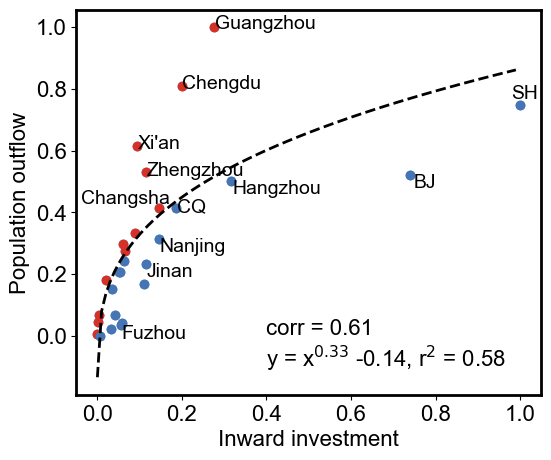

In [18]:
city2=['BJ','TJ','SH','CQ','Shijiazhuang','Taiyuan','沈阳','长春','哈尔滨','Nanjing','Hangzhou','合肥','Fuzhou','南昌','Jinan',
      'Zhengzhou','Wuhan','Changsha','Guangzhou','南宁','Haikou','Chengdu','贵阳','昆明','Xi\'an','Lanzhou','银川','乌鲁木齐']

plt.figure(figsize=[6,5])
plt.ylabel('Population outflow',fontsize=16)
plt.xlabel('Inward investment',fontsize=16)
plt.scatter(I_in2,y_out,color=['#4575b4'])

corr=np.corrcoef(I_in2, y_out)[0][1]

def fund(x, a, b):
    return x ** a + b

a, b = curve_fit(fund, I_in2, y_out)[0]
x = np.arange(0, 1, 0.01)
y = x ** a + b
plt.plot(x, y,color='black',linestyle='dashed',linewidth=2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
for i in range(len(y_out)):
    if y_out[i] <= fund(I_in2[i], a, b):
        plt.scatter(I_in2[i],y_out[i],color=['#4575b4'])
    else:
        plt.scatter(I_in2[i],y_out[i],color=['#d73027'])

for i in ['CQ','Guangzhou','Chengdu','Zhengzhou','Xi\'an']:
    plt.text(I_in2[city2.index(i)]*1.01, y_out[city2.index(i)]*1.01, i, fontsize=14,verticalalignment='center')
for i in ['BJ','Nanjing','Hangzhou','Jinan','Fuzhou']:
    plt.text(I_in2[city2.index(i)]*1.01, y_out[city2.index(i)]*1.01, i, fontsize=14,verticalalignment='top', horizontalalignment='left')
for i in ['SH']:
    plt.text(I_in2[city2.index(i)]*1.01, y_out[city2.index(i)]*1.01, i, fontsize=14,verticalalignment='bottom', horizontalalignment='center')
for i in ['Changsha']:
    plt.text(I_out2[city2.index(i)]*1.4, y_out[city2.index(i)], i, fontsize=14,verticalalignment='bottom', horizontalalignment='right')

pred=[]
for i in I_in2:
    pred.append(i ** a + b)
r2=r2_score(y_out, pred)
plt.text(x=0.4,y=-0.1, s='corr = %.2f\ny = x$^{%.2f}$ %.2f, r$^2$ = %.2f'%(corr,a,b,r2), fontsize=16)

bwith = 2 
ax = plt.gca()
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)

plt.show()

# AQI(2021)(27+4)cities

In [19]:
aqi = np.array([63.74794520547945,
 72.56593406593407,
 46.26373626373626,
 56.04931506849315,
 83.61917808219178,
 83.13186813186813,
 65.65934065934066,
 68.01095890410959,
 62.90934065934066,
 66.29395604395604,
 54.892857142857146,
 52.054794520547944,
 63.43681318681319,
 38.24657534246575,
 56.942465753424656,
 78.06301369863014,
 81.61369863013698,
 62.6986301369863,
 68.9478021978022,
 44.7967032967033,
 47.51780821917808,
 27.528767123287672,
 61.084931506849315,
 45.01923076923077,
 46.07397260273972,
 34.184065934065934,
 81.06027397260274,
 74.94794520547946,
 61.83561643835616,
 73.18082191780822,
 80.17307692307692,
               50])# aqi<=50:excellent
aqi=scaler.fit_transform(aqi.reshape(-1,1))
th=aqi[-1].tolist()
th=th[0]
aqi=[float(i) for i in aqi[:-1]]

In [20]:
th

0.4006252136960875

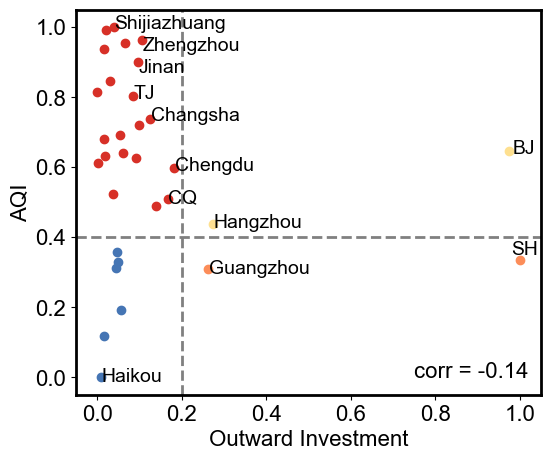

In [21]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import optimize as op

plt.figure(figsize=[6,5])
plt.ylabel('AQI',fontsize=16)
plt.xlabel('Outward Investment',fontsize=16)

corr=np.corrcoef(I_out, aqi)[0][1]

for i in range(len(aqi)):
    if aqi[i] <= th and I_out[i] <= 0.2:
        plt.scatter(I_out[i],aqi[i],color=['#4575b4'])
    elif aqi[i] <= th and I_out[i] > 0.2:
        plt.scatter(I_out[i],aqi[i],color=['#fc8d59'])
    elif aqi[i] > th and I_out[i] <= 0.2:
        plt.scatter(I_out[i],aqi[i],color=['#d73027'])
    else:
        plt.scatter(I_out[i],aqi[i],color=['#fee090'])
        
for i in ['BJ','TJ','CQ','Shijiazhuang','Hangzhou','Changsha','Guangzhou','Haikou','Chengdu']:
    plt.text(I_out[city.index(i)]*1.01, aqi[city.index(i)]*1.01, i, fontsize=14,verticalalignment='center')
for i in ['Jinan','Zhengzhou']:
    plt.text(I_out[city.index(i)]*1.01, aqi[city.index(i)]*1.01, i, fontsize=14,verticalalignment='top', horizontalalignment='left')
for i in ['SH']:
    plt.text(I_out[city.index(i)]*1.01, aqi[city.index(i)]*1.01, i, fontsize=14,verticalalignment='bottom', horizontalalignment='center')
plt.text(x=0.75,y=0, s='corr = %.2f'%(corr), fontsize=16)    

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axvline(x=0.2,color='grey',linestyle='dashed',linewidth=2)
plt.axhline(y=th,color='grey',linestyle='dashed',linewidth=2)

bwith = 2
ax = plt.gca()
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)

plt.show()
# print(corr)

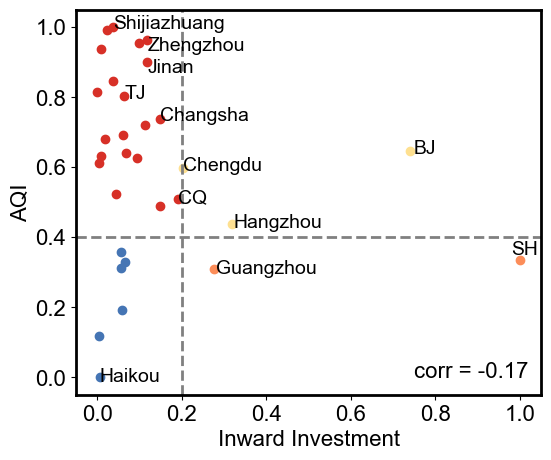

In [22]:
plt.figure(figsize=[6,5])
plt.ylabel('AQI',fontsize=16)
plt.xlabel('Inward Investment',fontsize=16)

corr=np.corrcoef(I_in, aqi)[0][1]

for i in range(len(aqi)):
    if aqi[i] <= th and I_in[i] <= 0.2:
        plt.scatter(I_in[i],aqi[i],color=['#4575b4'])
    elif aqi[i] <= th and I_in[i] > 0.2:
        plt.scatter(I_in[i],aqi[i],color=['#fc8d59'])
    elif aqi[i] > th and I_in[i] <= 0.2:
        plt.scatter(I_in[i],aqi[i],color=['#d73027'])
    else:
        plt.scatter(I_in[i],aqi[i],color=['#fee090'])
        
for i in ['BJ','TJ','CQ','Shijiazhuang','Hangzhou','Changsha','Guangzhou','Haikou','Chengdu']:
    plt.text(I_in[city.index(i)]*1.01, aqi[city.index(i)]*1.01, i, fontsize=14,verticalalignment='center')
for i in ['Jinan','Zhengzhou']:
    plt.text(I_in[city.index(i)]*1.01, aqi[city.index(i)]*1.01, i, fontsize=14,verticalalignment='top', horizontalalignment='left')
for i in ['SH']:
    plt.text(I_in[city.index(i)]*1.01, aqi[city.index(i)]*1.01, i, fontsize=14,verticalalignment='bottom', horizontalalignment='center')
plt.text(x=0.75,y=0, s='corr = %.2f'%(corr), fontsize=16)
    
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axvline(x=0.2,color='grey',linestyle='dashed',linewidth=2)
plt.axhline(y=th,color='grey',linestyle='dashed',linewidth=2)

bwith = 2 
ax = plt.gca()
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)

plt.show()